<a href="https://colab.research.google.com/github/Satkarjain/NLP/blob/master/Size_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
items_details =[]
file_name1 = "/content/drive/My Drive/item_details.json"
for line in open(file_name1, 'r'):
    items_details.append(json.loads(line))
    
df_items = pd.DataFrame(items_details)

In [0]:
df_items.shape

(82790, 18)

In [0]:
df_items.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [0]:
df_items.columns = ['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [0]:
df_items.dtypes

item_id            object
waist              object
size                int64
quality           float64
cup_size           object
hips               object
bra_size           object
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id            object
shoe_size          object
shoe_width         object
review_summary     object
review_text        object
dtype: object

In [0]:
df_items.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [0]:
df_items["item_id"].nunique()

1378

In [0]:
df_items["user_id"].nunique()

47958

In [0]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
df_items.height = df_items.height.apply(get_cms)

In [0]:
null_values = df_items.isnull().sum()

In [0]:
null_values/(len(df_items))    

item_id           0.000000
waist             0.965189
size              0.000000
quality           0.000821
cup_size          0.075553
hips              0.322817
bra_size          0.072690
category          0.000000
bust              0.856818
height            0.013371
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
shoe_size         0.662822
shoe_width        0.775251
review_summary    0.081230
review_text       0.081230
dtype: float64

Here we will drop waist and bust column because most of it value is NULL.

In [0]:
df_items.drop(columns=["waist","bust"],inplace = True)

In [0]:
num_col_convert = ["height", "bra_size","hips"]               #Converting these value to numeric 
df_items[num_col_convert] = df_items[num_col_convert].apply(pd.to_numeric, errors="coerce")

In [0]:
df_items.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,167.64,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,157.48,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,170.18,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,18,5.0,b,NaN,36.0,new,157.48,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [0]:
# Handling hips column
df_items.hips = df_items.hips.fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
df_items.hips = pd.cut(df_items.hips, bins, labels=labels)

# Handling length column
missing_rows = df_items[df_items.length.isnull()].index
df_items.drop(missing_rows, axis = 0, inplace=True)

# Handling quality
missing_rows = df_items[df_items.quality.isnull()].index
df_items.drop(missing_rows, axis = 0, inplace=True)

In [0]:
df_items.review_summary = df_items["review_summary"].fillna('Unknown')
df_items.review_text = df_items["review_text"].fillna('Unkown')
df_items.drop(['user_name'], axis=1, inplace=True)

In [0]:
median_bra_size = df_items["bra_size"].median()
df_items["bra_size"].fillna( value = median_bra_size,inplace=True )

In [0]:
df_items.describe()                                                     #Statistical analysis of numeric feature

,size,quality,bra_size,height
count,82697.000000,82697.000000,82697.000000,81594.000000
mean,12.660616,3.949128,35.974026,165.473059
std,8.271133,0.992736,3.105588,7.245555
min,0.000000,1.000000,28.000000,91.440000
25%,8.000000,3.000000,34.000000,160.020000
50%,12.000000,4.000000,36.000000,165.100000
75%,15.000000,5.000000,38.000000,170.180000
max,38.000000,5.000000,48.000000,241.300000


In [0]:
pd.DataFrame(df_items.groupby("fit")["quality"].value_counts())

quality
fit   quality         
fit   5.0        23097
      4.0        18877
      3.0        11739
      2.0         2365
      1.0          635
large 4.0         4304
      5.0         4027
      3.0         3396
      2.0         1063
      1.0          246
small 3.0         4386
      4.0         3926
      5.0         2474
      2.0         1701
      1.0          461

To ensure the recommender system is exposed to items with enough rental sample, thereby reducing noise, I want to filter out low-rental and low quality items.

In [0]:
# including items with more than 2 ratings
item_rating_count = pd.DataFrame(df_items.groupby("item_id")["quality"].count())
item_rating_count = item_rating_count.loc[(item_rating_count["quality"] >= 3)]
item_rating_count.reset_index(inplace=True)
df_items_reduced = df_items[df_items["item_id"].isin(item_rating_count["item_id"])]

Here we will filter out the users who had done transaction only one time because for them we can use popularity recommendation beacuse we do not know about the customer so we can not extract latent features from them.

In [0]:
 a = pd.DataFrame(df_items_reduced.groupby("user_id")["item_id"].count())

In [0]:
user_names = a[a["item_id"]>=2]

In [0]:
s = set()

In [0]:
for f in purchases_train:
  for x in f:
    s.add(x)


In [0]:
item_name = list(s)               #list of unique items

In [0]:
user_name_list = list(user_names.index)

In [0]:
len(user_name_list)

15948

In [0]:
purchases_train = []                      #list of items purchased by particular user
p=0
# populate the list with the product codes
for i in user_name_list:
  temp = df_items_reduced[df_items_reduced["user_id"] == i]["item_id"].tolist()
  purchases_train.append(temp)
  p = p+1
 # print(p)

My approach of recommendation include extracting 4 different feature from given dataset and then applying classification model.

Features:

1) Observable item feature: category, length and quality

2) Observable user feature: size, bra_size and height

3) Latent item feature: These are generated using skip gram based word2vec model. I use user’s purchase data and product content data from a single category to train category specific model. The input and output for the
word2vec are pairs of items purchased by the same user. After training the network, the activation of hidden layer for every item is the latent features vector.

4) Latent user feature: It is obtained by taking mean of all latent feature of items purchased by user.



![picture](https://drive.google.com/uc?export=view&id=1Otcid8r6WU8Vy4jwGcLwr7ihbZvVKYXJ)

This model is my own implementation of this research paper: https://kddfashion2017.mybluemix.net/final_submissions/ML4Fashion_paper_8.pdf

In [0]:
from gensim.models import Word2Vec

In [0]:
model = Word2Vec(size= 50, window = 5, sg = 1, hs = 0,min_count=1,
                 negative = 2, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

In [0]:
model.build_vocab(purchases_train)
model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(312692, 504240)

In [0]:
model.init_sims(replace=True)


In [0]:
print(model)


Word2Vec(vocab=736, size=50, alpha=0.03)


In [0]:
item_embedding = {}                          #embedding of all items
for f in item_name:
  item_embedding[f] = model[f]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
purchases_train_1 = {}
p=0
# populate the list with the product codes
for i in user_name_list:
  temp = df_items_reduced[df_items_reduced["user_id"] == i]["item_id"].tolist()
  purchases_train_1[i] = temp
  p = p+1
 # print(p)

In [0]:
user_embedding ={}
for key,items in purchases_train_1.items():
  a = np.zeros(50)
  size_1 = len(items)
  for x in items:
    a1 = model[x]
    a = a+a1
  a = a/size_1
  user_embedding[key] = a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
df_items_model = pd.DataFrame()

In [0]:
for f in item_name:
  r = df_items_reduced[df_items_reduced["item_id"]==f]
  df_items_model = pd.concat([df_items_model,r])

In [0]:
df_items_model.to_csv("df_items_model.csv")

In [0]:
 a_1 = pd.DataFrame(df_items_model.groupby("user_id")["item_id"].count())

In [0]:
user_name_list_1 = list(a_1.index)

In [0]:
len(user_name_list_1)

47133

In [0]:
user_info = []
p=0
# populate the list with the product codes
for i in user_name_list_1:
  temp = df_items_reduced[df_items_reduced["user_id"] == i]["item_id"].tolist()
  user_info.append(temp)
  p = p+1
  print(p)

In [0]:
df_items_model.reset_index(drop = True,inplace=True)

In [0]:
df_items_model.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,class_rating
0,403296,38,5.0,c,Unknown,48.0,new,160.02,slightly long,fit,773924,NaN,NaN,Love this top,"I bought two of this top, one in off white wit...",1
1,403296,8,5.0,d,Unknown,34.0,new,167.64,slightly long,large,716819,NaN,NaN,Love this shirt! So comfo,Love this shirt! So comfortable! It is very lo...,1
2,403296,20,4.0,d,Unknown,38.0,new,165.10,just right,fit,62253,NaN,NaN,"Pretty colors and fit, bu","Pretty colors and fit, but the material is a l...",1
3,403296,4,4.0,d,Unknown,34.0,new,162.56,slightly long,fit,175259,NaN,NaN,Love these! True to size,Love these! True to size fit.,1
4,403296,26,4.0,ddd/f,Unknown,40.0,new,177.80,just right,fit,739263,NaN,NaN,Nice long sleeves!,Nice long sleeves!,1


In [0]:
df_items_model_copy = df_items_model.copy()

In [0]:
df_items_model_copy["length"].unique()

array(['slightly long', 'just right', 'very long', 'slightly short',
       'very short'], dtype=object)

In [0]:
df_items_model_copy = pd.get_dummies(df_items_model_copy, columns=['category',"length"],drop_first=True)


In [0]:
 df_items_model.shape

(81609, 16)

In [0]:
df_items_model_copy.shape

(81609, 18)

In [0]:
df_item_latent  = pd.DataFrame()

In [0]:
missing=[0]*50
def fun(key):
    try:
        return(model[key])
    except:
        return(missing)

df_item_latent['vector'] = df_items_model_copy['item_id'].apply(fun)
df_item_latent = pd.DataFrame(df_item_latent['vector'].values.tolist())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [0]:
df_item_latent["item_id"] = df_items_model_copy["item_id"]

In [0]:
df_items_model_copy1 = df_items_model_copy[:10]

In [0]:
p= df_items_model_copy[df_items_model_copy["user_id"]=="978352"]
p.shape[0]

1

In [0]:
column_name = list(df_item_latent.columns)
column_name_new = []
for f in column_name:
  column_name_new.append(str(f)+"_")

df_item_latent.columns = column_name_new

In [0]:
 df_1 = pd.concat([df_items_model_copy,df_item_latent],axis =1)

In [0]:
df_user_latent = pd.DataFrame()
def fun1(key):
    p= df_items_model_copy[df_items_model_copy["user_id"]==key]
    if(p.shape[0]>1):
      return(user_embedding[key])

    else:
      key1 = list(p["item_id"])[0]
      return(model[key1])

df_user_latent['vector'] = df_items_model_copy['user_id'].apply(fun1)
df_user_latent = pd.DataFrame(df_user_latent['vector'].values.tolist())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [0]:
df_user_latent1 = df_user_latent.copy()

In [0]:
df_2 = pd.concat([df_1,df_user_latent1],axis =1)

In [0]:
df_2["height"].fillna(value = np.mean(df_2["height"]),inplace = True)

In [0]:
df_2.to_csv("item_product_final.csv")

In [0]:

df_2.drop(columns=["shoe_size","shoe_width","review_summary","review_text","class_rating","hips"],inplace = True)

In [0]:
df_2.isnull().sum()

item_id        0
size           0
quality        0
cup_size    6042
bra_size       0
            ... 
45             0
46             0
47             0
48             0
49             0
Length: 118, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [0]:
# including users who had purchased more than 2 items.
item_rating_count = pd.DataFrame(df_2.groupby("user_id")["item_id"].count())
item_rating_count = item_rating_count.loc[(item_rating_count["item_id"] >= 3)]
item_rating_count.reset_index(inplace=True)
df_2_reduced = df_2[df_2["user_id"].isin(item_rating_count["user_id"])]

In [0]:
df_2_reduced.drop(columns=["item_id","user_id","cup_size"],inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
a = {"fit":1, "small":0 , "large":0}
df_2_reduced["fit"] = df_2_reduced["fit"].apply(lambda x : a[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df_item_train1,df_item_tes1t = train_test_split(df_2_reduced,
                                               test_size=.2, 
                                               random_state=1001)

In [0]:
x_train1 = df_item_train1.drop(columns=["fit"])
y_train1 = df_item_train1["fit"]

In [0]:
x_train1.head()

,size,quality,bra_size,height,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,length_slightly long,length_slightly short,length_very long,length_very short,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,10_,11_,12_,13_,14_,15_,16_,17_,18_,19_,20_,21_,22_,23_,24_,25_,...,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
25911,15,5.0,38.0,162.56,1,0,0,0,0,0,0,0,0,0,-0.167803,0.079699,-0.093034,-0.188183,0.037256,0.217453,-0.047011,-0.112520,-0.029114,0.042007,-0.049808,-0.116706,-0.134812,-0.085428,-0.017332,0.243662,0.219856,0.225888,0.186828,0.140356,-0.305030,0.169203,-0.156165,0.034750,-0.048768,0.150330,...,-0.007766,-0.166257,-0.059652,-0.099416,0.032163,0.205713,0.167429,0.277881,0.257623,0.159531,-0.140330,0.151997,-0.155031,0.085829,0.031936,0.109650,-0.323028,0.057378,-0.001172,0.025153,-0.012146,-0.120919,0.008185,0.085048,-0.115049,-0.003803,0.113329,0.002525,0.042880,0.080031,0.259889,0.021807,-0.015453,0.087447,-0.069302,0.006464,0.191078,-0.064777,0.034369,-0.078304
29080,26,5.0,42.0,167.64,0,1,0,0,0,0,0,0,0,0,-0.141209,0.058614,-0.015353,-0.201490,-0.041249,0.247691,0.116398,-0.045342,0.033822,0.227530,0.026835,-0.133332,-0.078358,-0.031006,0.096696,0.147423,0.190309,0.252531,0.277299,0.146334,-0.152535,0.163348,-0.232811,0.055483,-0.151604,0.173920,...,-0.009104,-0.117102,-0.073371,-0.086831,0.024367,0.216775,0.161616,0.245360,0.202098,0.117261,-0.207073,0.127708,-0.155589,0.046395,-0.018561,0.145964,-0.275526,-0.057228,0.035899,0.044134,0.005724,-0.139528,0.019242,0.037181,-0.068478,-0.017774,0.122948,-0.040495,0.012081,0.089717,0.295565,0.033051,0.026456,0.100481,-0.045634,0.008371,0.167714,-0.081990,0.064875,-0.132621
40990,4,3.0,30.0,167.64,0,0,0,0,1,0,0,0,0,0,-0.066442,0.224263,0.037179,0.009829,-0.112730,-0.115270,-0.122052,0.122730,-0.088052,-0.284073,-0.054355,-0.126457,-0.027921,-0.219331,-0.115396,0.392813,0.153751,0.326180,0.083438,0.132755,-0.210482,0.021139,0.021604,0.007161,0.232730,0.022453,...,-0.078667,-0.120730,0.026946,-0.166046,-0.097800,0.347884,0.080555,0.301379,0.083685,0.105451,-0.189491,0.022466,-0.026264,0.040773,0.252484,0.048962,-0.145519,-0.029294,0.083000,-0.005867,0.103882,0.052811,0.020544,0.157441,-0.160118,0.000201,0.191249,-0.137758,0.062912,0.077285,0.128103,0.029575,-0.018240,0.111676,-0.066775,-0.049882,0.168336,-0.016701,-0.174501,-0.181014
6697,4,3.0,34.0,157.48,0,1,0,0,0,0,0,0,0,0,-0.166879,0.180570,-0.012215,-0.028121,-0.055845,0.062271,-0.043402,0.014895,-0.014930,0.052823,-0.014623,-0.176980,-0.125842,-0.169145,-0.024451,0.250877,0.245869,0.335011,0.319762,0.188893,-0.173662,0.143485,-0.123787,0.063177,0.106794,0.099787,...,-0.035129,-0.162769,-0.129591,-0.131021,-0.041577,0.205729,0.238938,0.294653,0.297104,0.172006,-0.136341,0.135813,-0.089312,0.047297,0.086934,0.085033,-0.355880,0.075668,0.024286,0.032559,-0.053763,-0.088697,-0.003803,0.062215,-0.194770,-0.014712,0.091923,0.035107,0.097921,0.037962,0.217107,-0.005214,-0.033605,0.079224,-0.075290,0.029686,0.235217,-0.004497,-0.024081,-0.073081
40961,12,5.0,34.0,170.18,0,0,0,0,1,0,0,0,0,0,-0.066442,0.224263,0.037179,0.009829,-0.112730,-0.115270,-0.122052,0.122730,-0.088052,-0.284073,-0.054355,-0.126457,-0.027921,-0.219331,-0.115396,0.392813,0.153751,0.326180,0.083438,0.132755,-0.210482,0.021139,0.021604,0.007161,0.232730,0.022453,...,-0.030711,-0.121968,-0.095675,-0.134090,-0.008473,0.269625,0.187324,0.236900,0.169676,0.121995,-0.268020,0.127432,-0.104891,0.060089,0.044109,0.114954,-0.271698,-0.070706,0.082381,0.034548,0.013920,-0.110326,0.009639,0.041866,-0.088987,-0.022789,0.130788,-0.034107,0.031006,0.052912,0.294393,-0.019653,0.034178,0.100067,-0.053147,0.020405,0.150230,-0.035187,0.007651,-0.198536


In [0]:
gb_clf = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_features="sqrt", max_depth=15, random_state=0)
gb_clf.fit(x_train1, y_train1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=15,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
x_test1 = df_item_tes1t.drop(columns=["fit"])
y_test1 = df_item_tes1t["fit"]

In [0]:
predictions1 = gb_clf.predict(x_test1)

roc_auc_score for DecisionTree:  0.6199320580242489


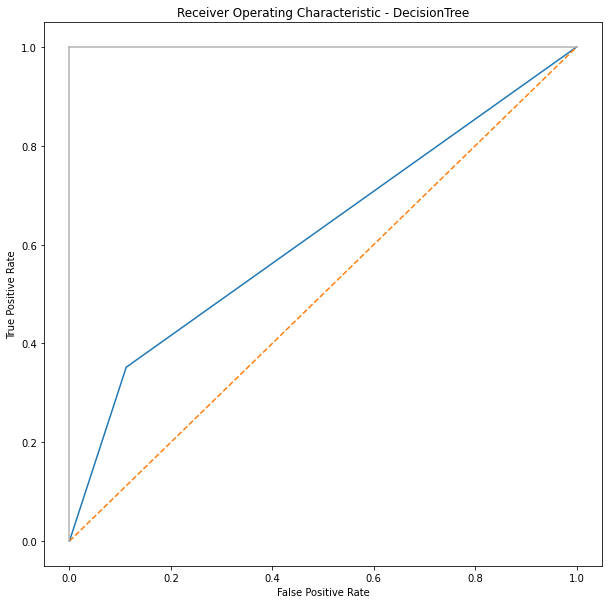

In [0]:
false_positive_rate11, true_positive_rate11, threshold1 = roc_curve(y_test1, predictions1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test1, predictions1))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate11, true_positive_rate11)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()